<a href="https://colab.research.google.com/github/Randyflourish/Intro2AI-Final/blob/main/AI_Final_BASALT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center">
  <img src="https://github.com/KarolisRam/MineRL2021-Intro-baselines/blob/main/img/colab_banner.png?raw=true">
</div>

# Introduction
This notebook is the installation part for the [MineRL 2022](https://minerl.io/) competition, building on the original introductory notebooks created for the MineRL 2021 competition.

## Note: About this file

This file is updated by NYCU 2024 Spring Intro2AI Team 11: まふまふ.
The original file is come from [here](https://colab.research.google.com/drive/1rJ3lGy-bG7kJRe_wYBWg7fjSaD9oOMDw?usp=sharing)

## There's a video to explain...
Please visit [this intro YouTube video](https://youtu.be/8yIrWcyWGek) to see some background information.  Hopefully, this will lead to a number of additional videos that explore what can be done in this environment...

And if you see me=@mdda online, then please say "Hi!"

## Software 2.0
The approach we are going to use, where we took some human written code and replaced it with an AI component is quite similar to how Tesla approaches self driving cars. See this talk by Andrej Karpathy, Director of AI at Tesla:  
[Building the Software 2.0 Stack](https://databricks.com/session/keynote-from-tesla)


# Setup

In [1]:
%%capture
!sudo add-apt-repository -y ppa:openjdk-r/ppa
!sudo apt-get purge openjdk-*
!sudo apt-get install openjdk-8-jdk
!sudo apt-get install xvfb xserver-xephyr vnc4server python-opengl ffmpeg
# Takes ~1min to run this
# New Add
!sudo apt-get install -y xvfb  # Install Xvfb

In [ ]:
# This takes ~22mins - which would hit us every time we start Colab
#   So we'll do it once, and store a '.tar.gz' of the installation into our
#   Google Drive, so that we can get it back much quicker the second time!

##%%capture
##!pip3 install --upgrade minerl # Default is 0.4.4, we want 1.0.0 for VPT
##!pip3 uninstall minerl
#!pip3 install git+https://github.com/minerllabs/minerl@v1.0.0
#
#!pip3 install pyvirtualdisplay
#!pip3 install -U colabgymrender

In [2]:
import os, sys, time

mine_env = 'mine_env'
mine_env_full = f'/content/{mine_env}'
mine_tar = f'{mine_env}.tar.gz'

if mine_env_full not in sys.path:
  sys.path.insert(0, mine_env_full)
  os.environ['PYTHONPATH'] += f':{mine_env_full}'

mine_env, mine_env_full, mine_tar

('mine_env', '/content/mine_env', 'mine_env.tar.gz')

In [3]:
# We'll connect to our Google Drive here, and see whether we've already saved off a copy
#   This will ask permission to 'connect to your drive' : The answer is 'Yes'!
MINE_ENV_IS_NEW = True

from google.colab import drive  # google.colab contains functions specifically for interacting with Google Colab's environment.
drive.mount('/content/drive')    # mounts your Google Drive as a local file system
if os.path.isfile(f'/content/drive/MyDrive/pythonLib/{mine_tar}'): # check if "mine_env.tar.gz" is in your Google Drive
  ! cp /content/drive/MyDrive/pythonLib/$mine_tar ./$mine_tar  # ! means the command is to be executed in the shell rather than as Python code.
                                              # This command copies the file from your Google Drive to the current working directory of the Colab notebook.

  ! ls -l ./$mine_tar                         # This lists the file details such as permissions, owner, size, and modification date for the copied file in the current directory.
                                              # It helps verify that the file has been copied correctly and shows its properties.
  # e.g.: -rw------- 1 root root 1510118446 Jun 26 08:48 ./mine_env.tar.gz

  # ! tar -tzf ./$mine_tar | grep minerl | head -5    # list some contents of the compressed tar file without extracting it
  ! tar -xzf ./$mine_tar    # This extracts the contents of the tar file into the current directory

  MINE_ENV_IS_NEW = False
  # Takes 1min too (huge saving!)

sys.path.append('/content/drive/MyDrive/pythonLib')

"DONE"

Mounted at /content/drive
-rw------- 1 root root 1504139165 May 11 09:34 ./mine_env.tar.gz


'DONE'

In [ ]:
# Check default packages
!pip3 list

In [4]:
# Build the mine_env if necessary
try:
  from pyvirtualdisplay import Display
except :
  !pip3 install --target=$mine_env git+https://github.com/minerllabs/minerl@v1.0.2   # 21 mins
  # https://stackoverflow.com/questions/55833509/attributeerror-type-object-callable-has-no-attribute-abc-registry
  !mv $mine_env/typing.py $mine_env/MEH-typing.py  # Fix for Python3.7 ...

  !pip3 install --target=$mine_env pyvirtualdisplay  # 4 secs  #注 Display creates a virtual framebuffer that graphical applications can use to render output as if they were using a real monitor.
                                                              #注 This allows you to run applications that require a GUI without having an actual GUI environment installed on the system.
  !pip3 install --target=$mine_env --upgrade colabgymrender # 22 secs  #注 colabgymrender provides a workaround by capturing the graphical output of the environment and displaying it within the notebook.

  MINE_ENV_IS_NEW = True
  # NB: some restart notices in the output ... but there's no need to restart!
  #     In any case, please wait for the 'DONE' message to print out
f"DONE, with MINE_ENV_IS_NEW={MINE_ENV_IS_NEW}"

'DONE, with MINE_ENV_IS_NEW=False'

In [6]:
# check content of mine_env
! du -b mine_env | tail -5  # mine_env = ~ 2,094,031,775 bytes overall

5125	mine_env/cv2/barcode
81248682	mine_env/cv2
6772	mine_env/proglog-0.1.10.dist-info
292010	mine_env/scipy-1.13.0.dist-info
2081331204	mine_env


In [8]:
# Build new env.tar.gz file in google drive (should not be executed)
if MINE_ENV_IS_NEW: #  or True
  # ! ls -l /gdrive/MyDrive/mine*
  ! rm -f ./$mine_tar   #注 removes the existing tar.gz archive of the environment, if any, from the current directory.
  ! tar -czf ./$mine_tar $mine_env  #注 This command creates a new compressed (gzipped) tar archive of the directory specified by the $mine_env variable (the environment directory).
  ! ls -l ./$mine_tar
  # Without running the env...
  # -rw-r--r-- 1 root root 1505020174 Jun 26 07:26 ./mine_env.tar.gz
  # Once the minerl env has been reset once (i.e. java has built...)
  # -rw------- 1 root root 1511976116 Jun 26 08:43 ./mine_env.tar.gz
  ! tar -tzf ./$mine_tar | head
  ! cp ./$mine_tar /content/drive/MyDrive/pythonLib/  #注 This copies the newly created archive to a Google Drive directory.
  ! ls -l /content/drive/MyDrive/pythonLib/$mine_tar
"DONE"

'DONE'

# Import Libraries

In [8]:
import os   # For interacting with the operating system.

import numpy as np  # For numerical operations.

import gym    # To create and manage environments based on the OpenAI Gym toolkit.
import minerl

from tqdm.notebook import tqdm  # For displaying progress bars in Jupyter notebooks.
from colabgymrender.recorder import Recorder # To facilitate rendering of Gym environments in Google Colab.
from pyvirtualdisplay import Display # To create a virtual display to render environments in a headless server or environment like Google Colab.

import logging
logging.disable(logging.ERROR) # reduce clutter, remove if something doesn't work to see the error logs.

np.__version__  # '1.21.6' => that this is reading from our ~/mine_env directory
# Numpy version may be different from the content above
# About warning: since warning is in a local package, so if error occurs, please comment the specific line

  np.bool8: (False, True),



'1.25.2'

In [9]:
import cv2
#from google.colab.patches import cv2_imshow
#from PIL import Image
import matplotlib.pylab as plt

In [13]:
disp = Display(visible=0, backend="xvfb")
disp.start();

In [ ]:
env = gym.make("MineRLBasaltFindCave-v0")

In [ ]:
env.action_space.sample().keys()

odict_keys(['ESC', 'attack', 'back', 'camera', 'drop', 'forward', 'hotbar.1', 'hotbar.2', 'hotbar.3', 'hotbar.4', 'hotbar.5', 'hotbar.6', 'hotbar.7', 'hotbar.8', 'hotbar.9', 'inventory', 'jump', 'left', 'pickItem', 'right', 'sneak', 'sprint', 'swapHands', 'use'])

In [ ]:
# Have a look at a few actions we might do:
for _ in range(10):
  print( env.action_space.sample() )

OrderedDict([('ESC', array(1)), ('attack', array(0)), ('back', array(0)), ('camera', array([-142.41829,  -86.41872], dtype=float32)), ('drop', array(0)), ('forward', array(1)), ('hotbar.1', array(1)), ('hotbar.2', array(1)), ('hotbar.3', array(1)), ('hotbar.4', array(0)), ('hotbar.5', array(0)), ('hotbar.6', array(1)), ('hotbar.7', array(0)), ('hotbar.8', array(1)), ('hotbar.9', array(1)), ('inventory', array(1)), ('jump', array(0)), ('left', array(0)), ('pickItem', array(1)), ('right', array(0)), ('sneak', array(0)), ('sprint', array(1)), ('swapHands', array(0)), ('use', array(0))])
OrderedDict([('ESC', array(1)), ('attack', array(0)), ('back', array(1)), ('camera', array([67.95189, 65.12552], dtype=float32)), ('drop', array(0)), ('forward', array(1)), ('hotbar.1', array(0)), ('hotbar.2', array(0)), ('hotbar.3', array(1)), ('hotbar.4', array(0)), ('hotbar.5', array(0)), ('hotbar.6', array(1)), ('hotbar.7', array(0)), ('hotbar.8', array(1)), ('hotbar.9', array(1)), ('inventory', array(

In [ ]:
t0=time.time()
obs = env.reset()  # First obs is thrown away...
print(f"{(time.time()-t0):.2f}sec for env.reset")
# 275.65sec = 4mins for first time, 80.73sec second time (due to compilation of java files?)

166.04sec for env.reset


0.42sec for env.step


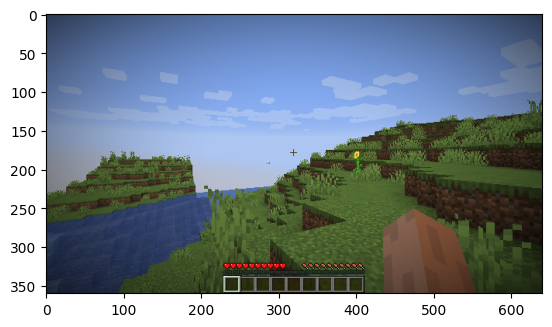

0.57sec for env.step


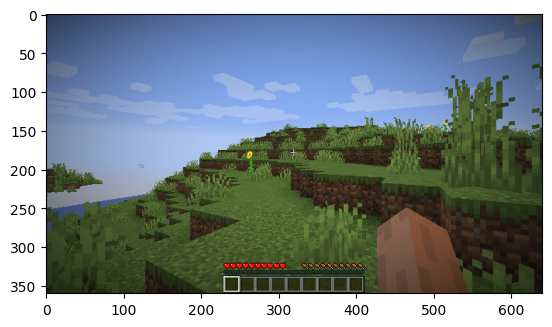

0.19sec for env.step


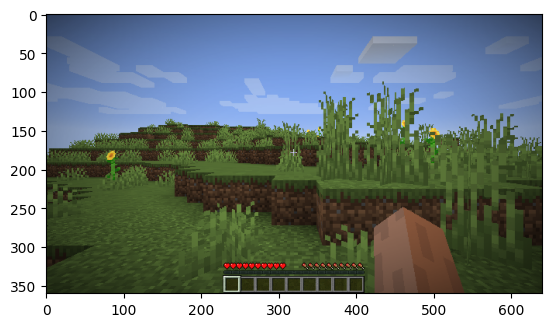

0.51sec for env.step


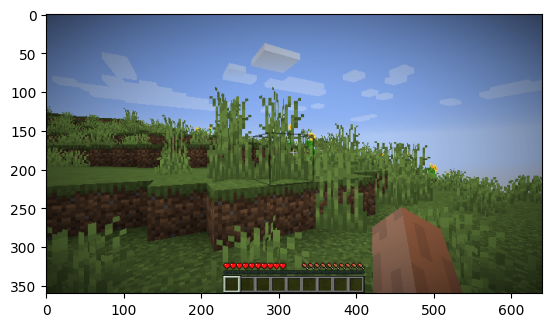

0.30sec for env.step


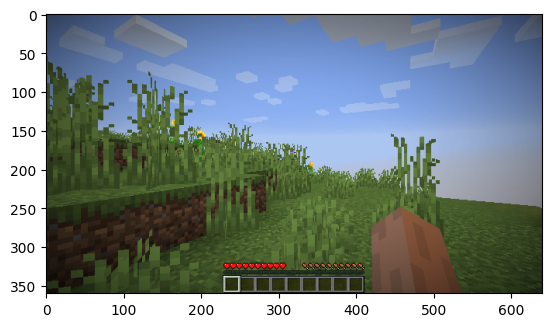

0.16sec for env.step


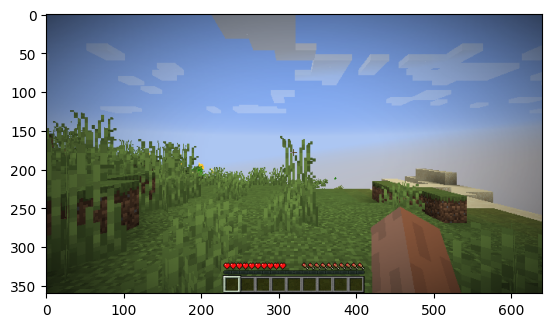

0.26sec for env.step


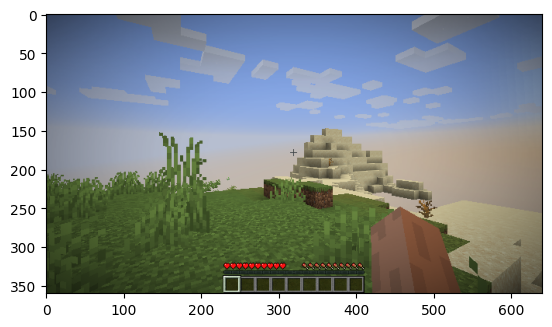

0.22sec for env.step


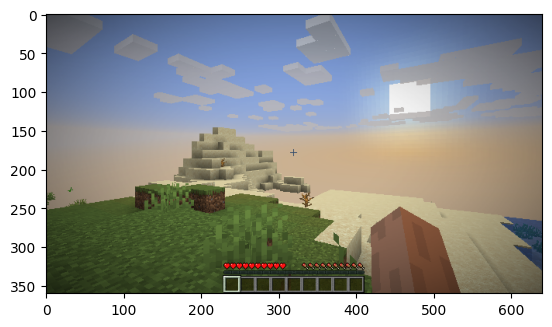

0.30sec for env.step


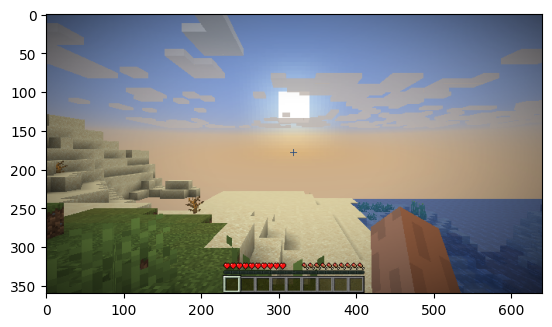

0.27sec for env.step


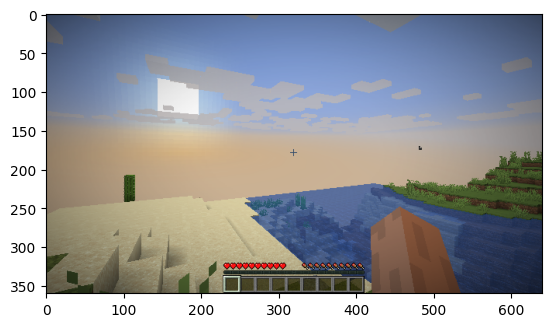

0.31sec for env.step


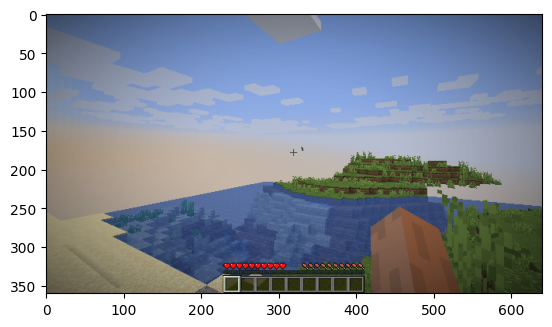

0.25sec for env.step


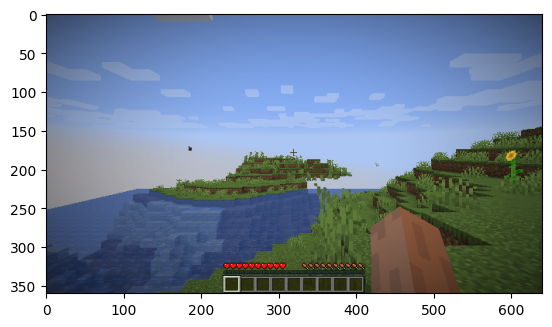

0.25sec for env.step


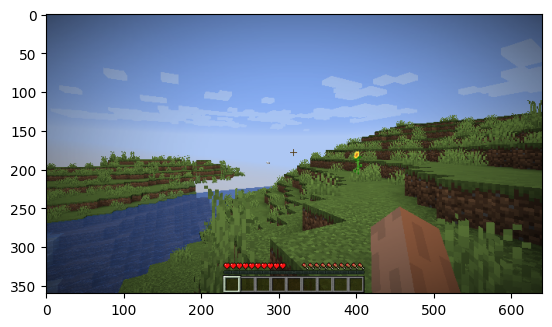

0.46sec for env.step


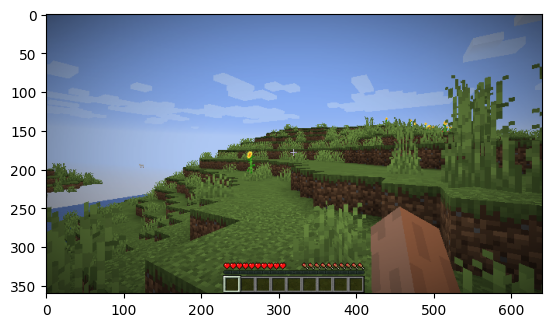

0.35sec for env.step


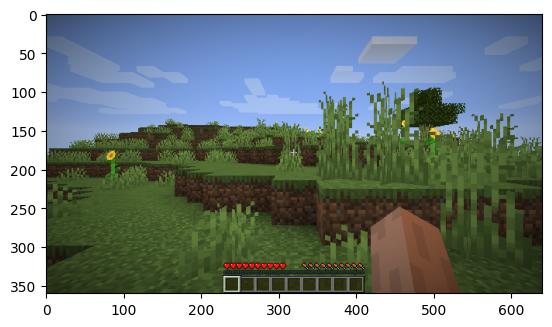

0.65sec for env.step


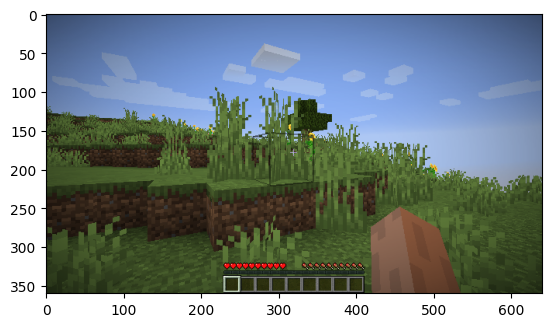

0.53sec for env.step


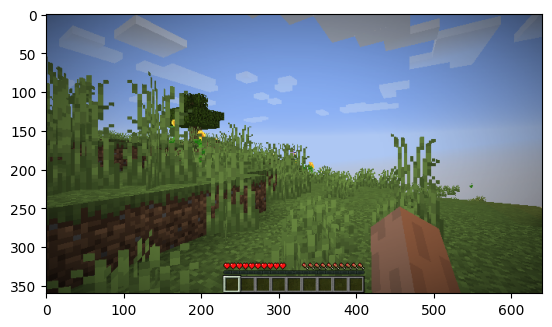

0.35sec for env.step


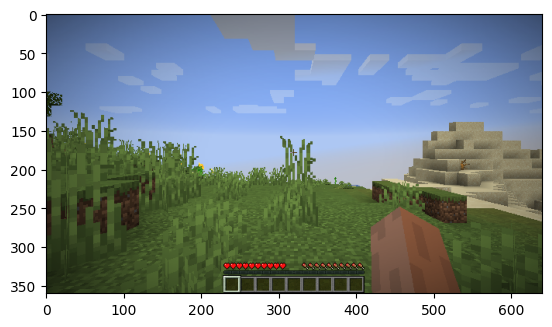

0.37sec for env.step


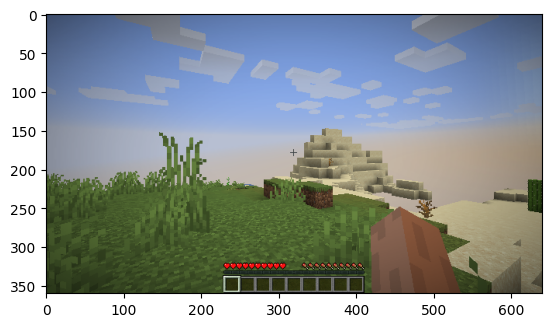

0.24sec for env.step


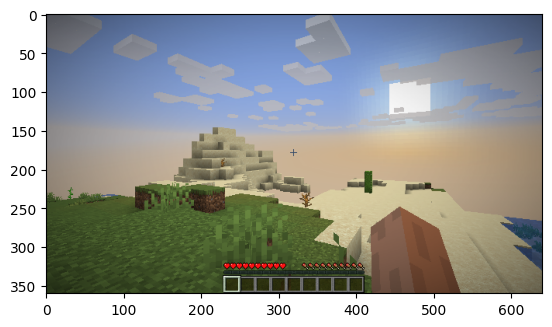

0.26sec for env.step


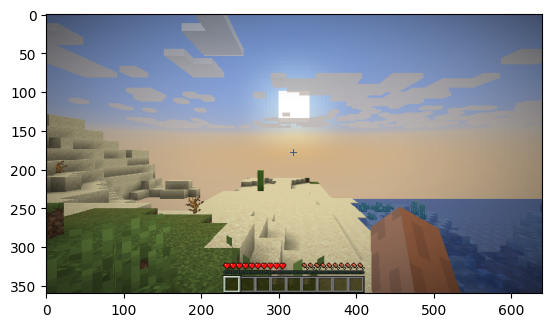

0.23sec for env.step


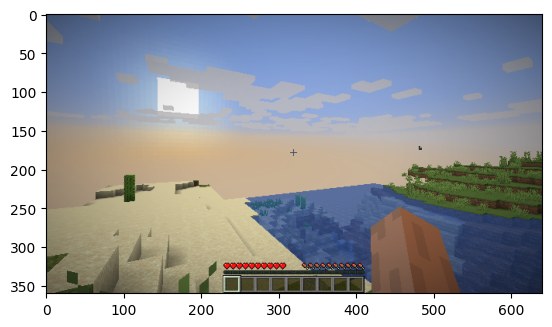

0.20sec for env.step


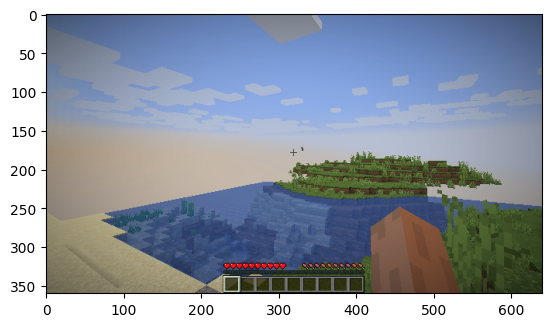

'23.47sec for whole spin'

In [ ]:
# Now that Steve has been spawned, do some actions...
t0=time.time()

done, iter = False, 0
while not done:
    ac = env.action_space.noop()
    # Spin around to see what is around us
    ac["camera"] = [0, +30]  # (pitch, yaw) deltas in degrees : +30 => turn to right

    t1=time.time()
    obs, reward, done, info = env.step(ac)
    #print(obs, reward, info)  # NB: Yikes : obs is only the image!
    #  obs = Dict(pov:Box(low=0, high=255, shape=(360, 640, 3)))
    #print(pov.shape) # (360, 640, 3)  Image spec agrees with docs!
    print(f"{(time.time()-t1):.2f}sec for env.step")  # Approx 0.25sec per step

    pov = obs["pov"]

    #env.render()  # This does an internal cv2.imshow that colab rejects
    #cv2_imshow(pov[:, :, ::-1])
    #cv2.waitKey(1)

    plt.imshow(pov)
    plt.show()
    iter +=1
    if iter>22: done=True

f"{(time.time()-t0):.2f}sec for whole spin"

In [ ]:
# Set up a simple testing function
def action_step(action):
  ac = env.action_space.noop()
  ac.update(action)
  obs, reward, done, info = env.step(ac)
  plt.imshow(obs["pov"])
  plt.show()

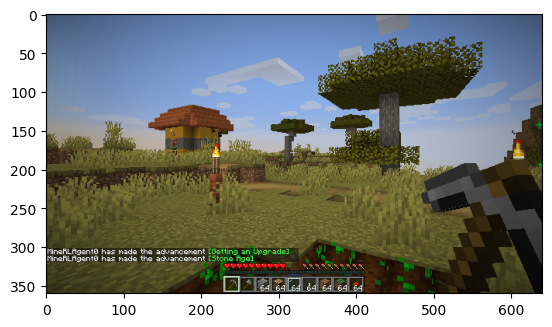

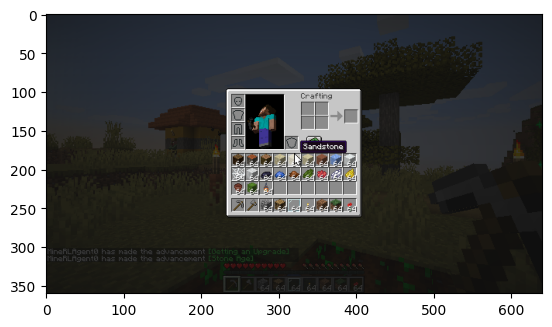

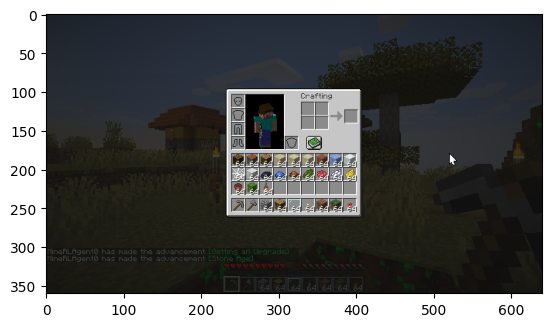

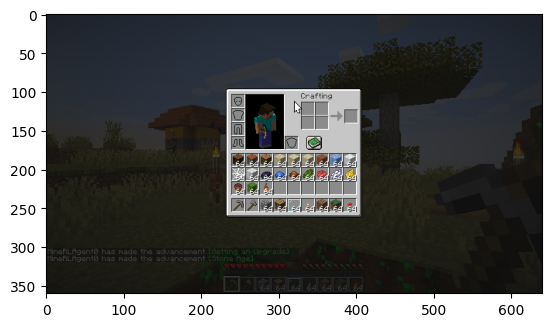

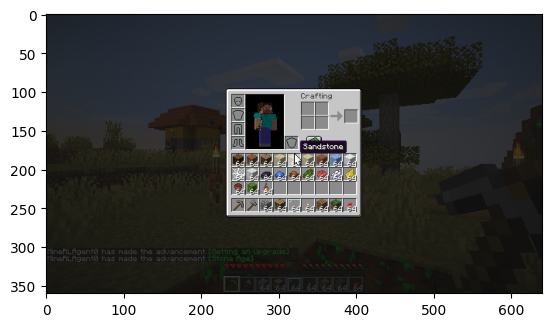

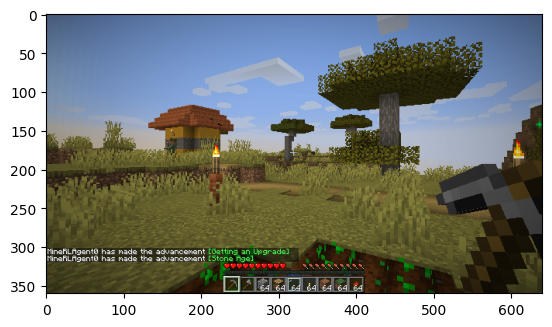

In [ ]:
action_step({})
action_step(dict(inventory=[1]))
action_step(dict(camera=[0, +30]))
action_step(dict(camera=[-10, -30]))
action_step(dict(camera=[+10, 0]))
action_step(dict(inventory=[1]))  # Put inventory away? = Yes, if it is showing

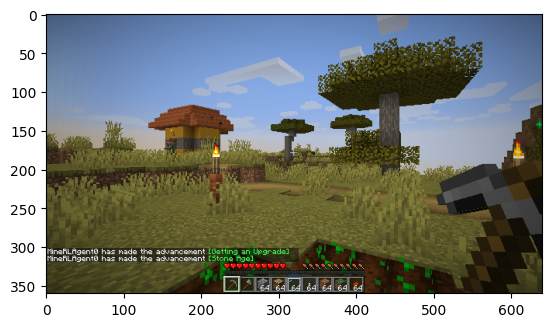

In [ ]:
#action_step({'inventory':[1]})  # Put inventory away? = NOT jump, sneak, use, hotbar.X, back
action_step({})  # NOOP

In [ ]:
# Set up a simple calibration function
import cv2
from google.colab.patches import cv2_imshow

def action_step_calibrate(x_off,y_off):
  ac = env.action_space.noop()
  ac.update(dict(camera=[y_off, x_off]))
  obs, reward, done, info = env.step(ac)
  im = obs["pov"][100:250, 200:400,:]
  cv2_imshow(cv2.cvtColor(im, cv2.COLOR_RGB2BGR))
  ac = env.action_space.noop()
  ac.update(dict(camera=[-y_off, -x_off]))  # Move back
  obs, reward, done, info = env.step(ac)

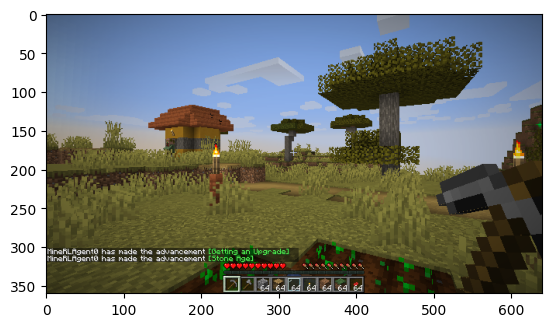

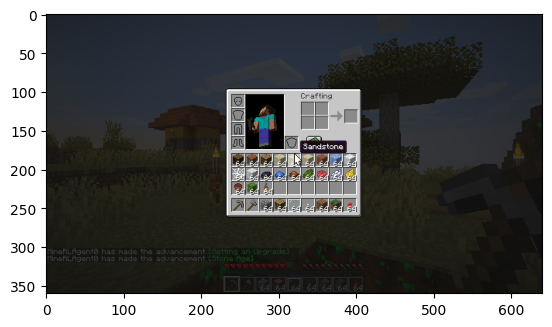

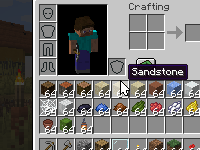

x_off=0.62


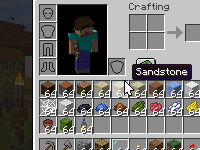

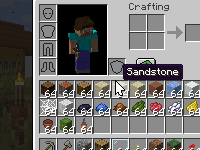

x_off=1.61


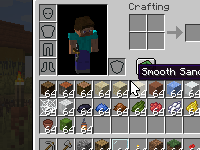

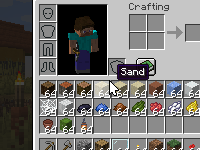

x_off=3.22


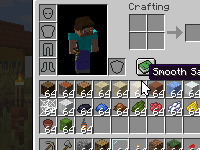

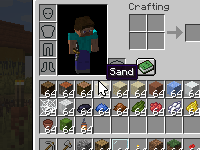

x_off=5.81


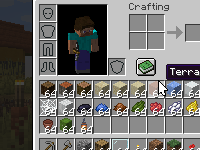

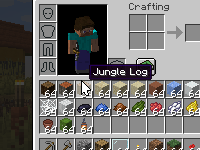

x_off=10.0


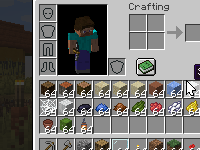

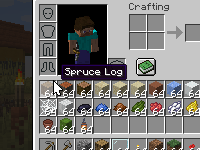

y_off=0.62


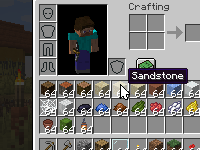

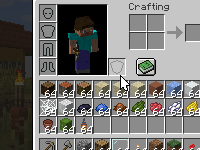

y_off=1.61


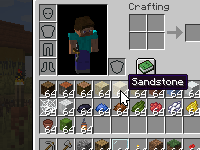

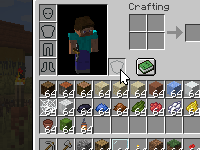

y_off=3.22


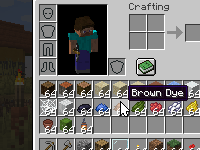

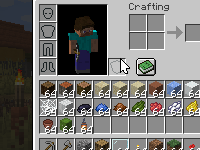

y_off=5.81


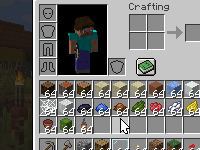

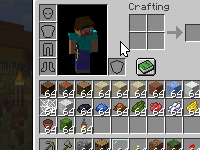

y_off=10.0


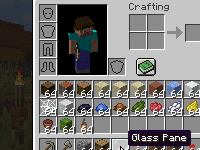

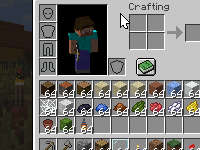

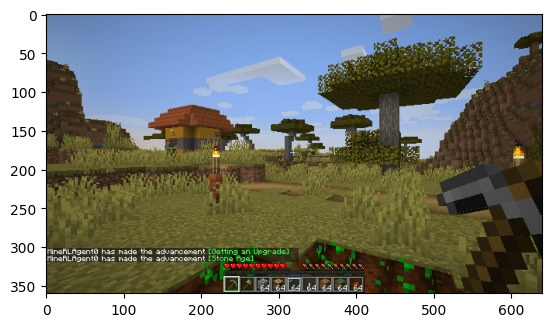

In [ ]:
action_step({})
action_step(dict(inventory=[1]))

action_step_calibrate(0, 0)
for x_off in [+0.62, +1.61, +3.22, +5.81, +10.0]:
  print(f"x_off={x_off}")
  action_step_calibrate(x_off,0)
  action_step_calibrate(-x_off,0)
for y_off in [+0.62, +1.61, +3.22, +5.81, +10.0]:
  print(f"y_off={y_off}")
  action_step_calibrate(0, y_off)
  action_step_calibrate(0, -y_off)

action_step(dict(inventory=[1]))  # Put inventory away? = Yes, if it is showing

In [ ]:
! nvidia-smi

Sun Jun 26 16:06:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
env.close()

In [ ]:
disp.stop();

In [ ]:
# THE END! - We'll be using this set-up in the future!